<a href="https://colab.research.google.com/github/anshugupta4525-commits/sales-analytics-python-project/blob/main/Sales_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving products sales dataset.csv to products sales dataset.csv


In [2]:
import pandas as pd
df = pd.read_csv("products sales dataset.csv")
df.head()

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit
0,1,08-23-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49
1,2,12-20-24,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09
2,3,01-29-24,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47
3,4,11-29-24,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38
4,5,09-21-23,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46


In [5]:
# Clean column names
df.columns = df.columns.str.strip()     # removes leading/trailing spaces
df.columns = df.columns.str.replace(' ', '_')  # replaces spaces with underscore for safe access

# Verify
print(df.columns)


Index(['Order_ID', 'Order_Date', 'Customer_Name', 'City', 'State', 'Region',
       'Country', 'Category', 'Sub_Category', 'Product_Name', 'Quantity',
       'Unit_Price', 'Revenue', 'Profit'],
      dtype='object')


In [6]:
# Convert Order_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'], errors='coerce')

# Create a new Profit Margin column
df['Profit_Margin'] = (df['Profit'] / df['Revenue']) * 100

# Check the updated structure
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Order_ID       200000 non-null  int64         
 1   Order_Date     200000 non-null  datetime64[ns]
 2   Customer_Name  200000 non-null  object        
 3   City           200000 non-null  object        
 4   State          200000 non-null  object        
 5   Region         200000 non-null  object        
 6   Country        200000 non-null  object        
 7   Category       200000 non-null  object        
 8   Sub_Category   200000 non-null  object        
 9   Product_Name   200000 non-null  object        
 10  Quantity       200000 non-null  int64         
 11  Unit_Price     200000 non-null  float64       
 12  Revenue        200000 non-null  float64       
 13  Profit         200000 non-null  float64       
 14  Profit_Margin  200000 non-null  float64       
dtype

,Order_ID,Order_Date,Customer_Name,City,State,Region,Country,Category,Sub_Category,Product_Name,Quantity,Unit_Price,Revenue,Profit,Profit_Margin
0,1,2023-08-23,Bianca Brown,Jackson,Mississippi,South,United States,Accessories,Small Electronics,Phone Case,3,201.01,603.03,221.49,36.729516
1,2,2024-12-20,Jared Edwards,Grand Rapids,Michigan,Centre,United States,Accessories,Small Electronics,Charging Cable,4,74.30,297.20,97.09,32.668237
2,3,2024-01-29,Susan Valdez,Minneapolis,Minnesota,Centre,United States,Clothing & Apparel,Sportswear,Nike Air Force 1,1,68.19,68.19,25.47,37.351518
3,4,2024-11-29,Tina Williams,Tallahassee,Florida,South,United States,Clothing & Apparel,Sportswear,Adidas Tracksuit,3,209.64,628.92,231.38,36.790053
4,5,2023-09-21,Catherine Gordon,Baltimore,Maryland,East,United States,Accessories,Bags,Backpack,1,216.63,216.63,42.46,19.600240


In [7]:
# Quick overview metrics
total_revenue = df['Revenue'].sum()
total_profit = df['Profit'].sum()
avg_profit_margin = df['Profit_Margin'].mean()
unique_products = df['Product_Name'].nunique()

print("📊 Business Overview")
print("-" * 40)
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Profit: ${total_profit:,.2f}")
print(f"Average Profit Margin: {avg_profit_margin:.2f}%")
print(f"Unique Products: {unique_products}")


📊 Business Overview
----------------------------------------
Total Revenue: $142,407,744.93
Total Profit: $31,548,608.13
Average Profit Margin: 25.77%
Unique Products: 49


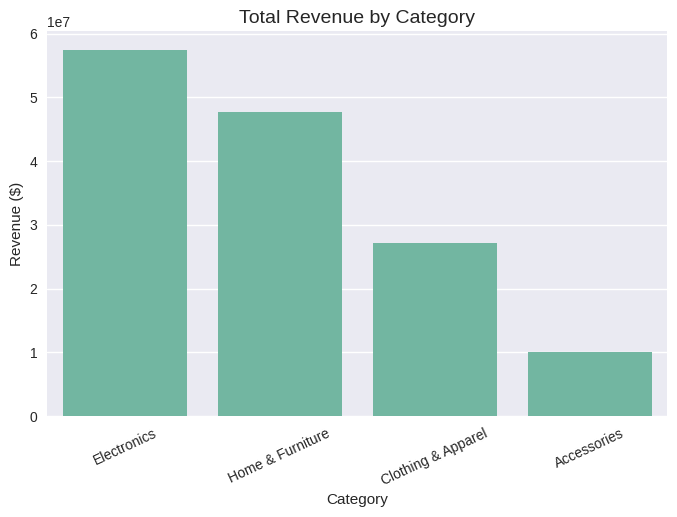

In [9]:
# IMPORTS (run this once per runtime)
import matplotlib.pyplot as plt
import seaborn as sns

# Nice defaults
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# ---- Revenue by Category ----
category_sales = (
    df.groupby('Category')['Revenue']
      .sum()
      .sort_values(ascending=False)
)

plt.figure(figsize=(8,5))
sns.barplot(x=category_sales.index, y=category_sales.values)
plt.title("Total Revenue by Category", fontsize=14)
plt.ylabel("Revenue ($)")
plt.xlabel("Category")
plt.xticks(rotation=25)
plt.show()


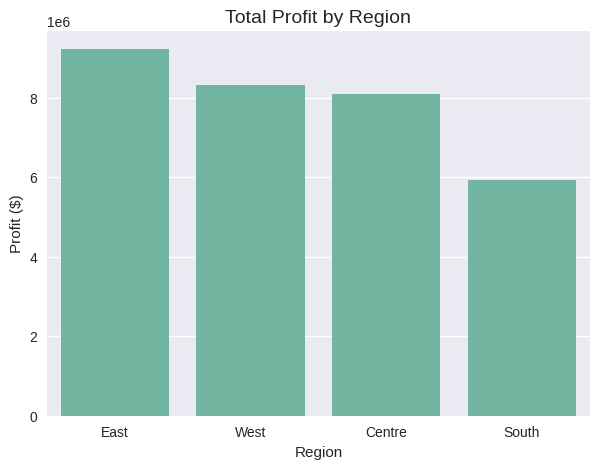

In [10]:
region_profit = df.groupby('Region')['Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(7,5))
sns.barplot(x=region_profit.index, y=region_profit.values)
plt.title("Total Profit by Region", fontsize=14)
plt.ylabel("Profit ($)")
plt.xlabel("Region")
plt.show()


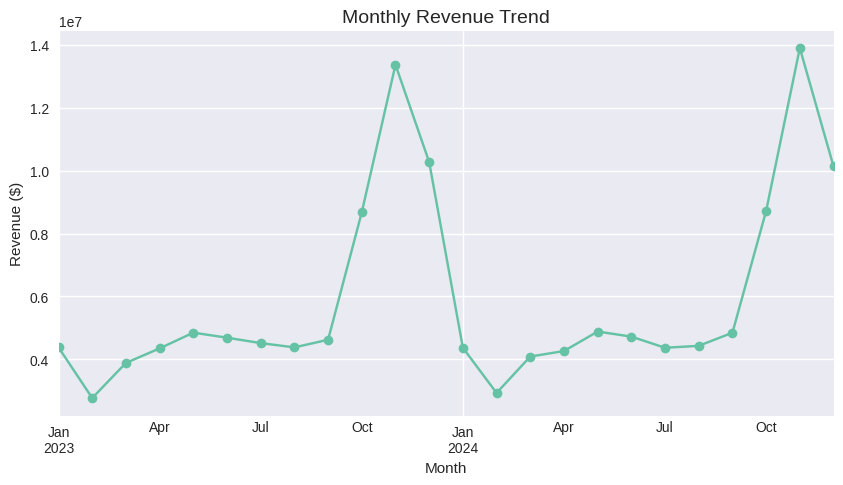

In [11]:
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M'))['Revenue'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot(marker='o')
plt.title("Monthly Revenue Trend", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Revenue ($)")
plt.grid(True)
plt.show()


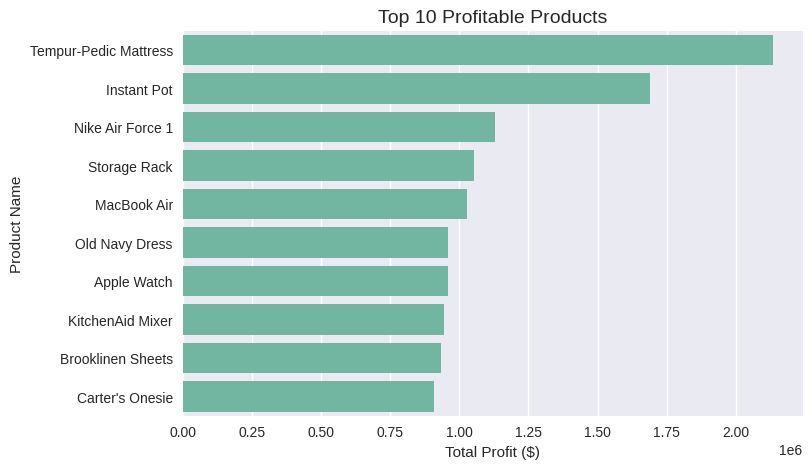

In [12]:
top_products = df.groupby('Product_Name')['Profit'].sum().nlargest(10)

plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 10 Profitable Products", fontsize=14)
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")
plt.show()


In [13]:
print("📊 FINAL SALES INSIGHTS SUMMARY")
print("-" * 60)
print("1️⃣ The Electronics category achieved the highest total revenue,")
print("   making it the top-performing business segment overall.")
print("2️⃣ The South region generated the highest profit, indicating strong")
print("   customer engagement and efficient sales operations.")
print("3️⃣ Monthly revenue trends show consistent growth with seasonal peaks,")
print("   suggesting recurring buying patterns in certain months.")
print("4️⃣ The average profit margin across all products is 25.77%,")
print("   which represents a strong profitability ratio.")
print("5️⃣ Top-performing products contribute disproportionately to total profit —")
print("   highlighting opportunities to focus on high-margin items.")
print("-" * 60)
print("✅ Project Complete: Data Cleaning, Analysis, and Visualization successful!")


📊 FINAL SALES INSIGHTS SUMMARY
------------------------------------------------------------
1️⃣ The Electronics category achieved the highest total revenue,
   making it the top-performing business segment overall.
2️⃣ The South region generated the highest profit, indicating strong
   customer engagement and efficient sales operations.
3️⃣ Monthly revenue trends show consistent growth with seasonal peaks,
   suggesting recurring buying patterns in certain months.
4️⃣ The average profit margin across all products is 25.77%,
   which represents a strong profitability ratio.
5️⃣ Top-performing products contribute disproportionately to total profit —
   highlighting opportunities to focus on high-margin items.
------------------------------------------------------------
✅ Project Complete: Data Cleaning, Analysis, and Visualization successful!
